# AirBnB Listing Analysis - Analyzed AirBnB listings in Paris to determine the impact of recent regulations.

### AirBnB is a platform where indivisuals can rent their homes for travellers. As a Performance Analyst mine job role is to analyze Paris homes listings, most focus on pricing and get to know how 2015 regulations impacted the Paris Market? 

### I started with the given data by Maven Analytics and did some formating to get the desired outputs asked by Leadership.

### Liabraries Imported - Pandas, Matplotlib, Seaborn
### Tools Used - Python, Jupyter Notebook, MS-Excel and VS Code 

In [1]:
import pandas as pd

### Loading Dataset

#### You can get dataset on Maven website = https://app.mavenanalytics.io/guided-projects/4fee7ee7-4c04-46e7-9f3e-99b987980842

In [2]:
Listings_data = pd.read_csv(r"C:\Users\Nishs\Downloads\Listings.csv", encoding = "ISO-8859-1", low_memory= False)

# encoding="ISO-8859-1":
# This specifies the character encoding of the CSV file

#low_memory = False
#Setting low_memory=False forces pandas to read the entire file at once, which uses more memory but ensures that data types are correctly inferred for each column. 
# This can prevent errors and ensure data integrity, especially when working with large CSV files or those with inconsistent data types.

In [3]:
Listings_data.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
Listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

### Formating [HOST_SINCE] Column to datetime from object datatypes.

In [5]:
Listings_data['host_since'] = pd.to_datetime(Listings_data['host_since'])

# pd.to_datetime function used here to conert host_since column from object to date_time format.

In [6]:
Listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

### Filtering the data for city = Paris and keep only the columns 
### ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’

In [7]:
Paris_Listings = Listings_data.query("city == 'Paris'").loc[: , ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

# In Pandas, .loc is used to access and manipulate data in a DataFrame using label-based indexing

In [8]:
Paris_Listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


### Checking for missing values, and calculate the minimum, maximum, and average for each numeric field

In [9]:
Paris_Listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [10]:
Paris_Listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [11]:
Paris_Listings.query("accommodates == 0") #.count()

,host_since,neighbourhood,city,accommodates,price
98209,2020-07-20,Pantheon,Paris,0,0
203257,2020-02-04,Batignolles-Monceau,Paris,0,0
203258,2016-10-17,Opera,Paris,0,0
203259,2020-04-24,Luxembourg,Paris,0,0
203260,2020-04-24,Vaugirard,Paris,0,0
203261,2020-07-15,Batignolles-Monceau,Paris,0,0
203263,2016-06-07,Palais-Bourbon,Paris,0,0
203264,2020-09-08,Pantheon,Paris,0,0
203265,2020-09-21,Vaugirard,Paris,0,0
203267,2020-10-29,Observatoire,Paris,0,0


### Creating a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)

In [12]:
Paris_Listings_Neighbourhood = (Paris_Listings.groupby("neighbourhood").agg({"price" : "mean"}).sort_values("price"))

Paris_Listings_Neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [13]:
Paris_Listings_Neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


### Creating a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

In [14]:
Paris_Listings_Accommodates = (Paris_Listings.query("neighbourhood == 'Elysee'")
                               .groupby("accommodates")
                               .agg({"price" : "mean", "neighbourhood" : "count"})
                               .sort_values("price")
                               )

Paris_Listings_Accommodates.head()

,price,neighbourhood
accommodates,,
0,0.000000,6
1,79.522222,90
3,152.828767,146
2,155.103352,716
4,212.096070,458


In [15]:
Paris_Listings_Accommodates = (Paris_Listings.query("neighbourhood == 'Elysee'")
                               .groupby("accommodates")
                               .agg({"price" : "mean", "neighbourhood" : "count"})
                               .sort_values("price")
                               )

Paris_Listings_Accommodates.tail()

,price,neighbourhood
accommodates,,
12,529.625,8
16,800.000,1
11,805.000,4
13,842.500,2
14,971.000,2


### Creating a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts

In [16]:
Paris_Listings_Over_Time = (Paris_Listings
                            .set_index("host_since")
                            .resample("YE")
                            .agg({"neighbourhood" : "count",
                                  "price" : "mean"})
                            )

Paris_Listings_Over_Time.head()

# In pandas, .resample() is a powerful method used for time series data manipulation. It changes the frequency of the time series.

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


# Visualize the data and summarize findings

### Created a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed

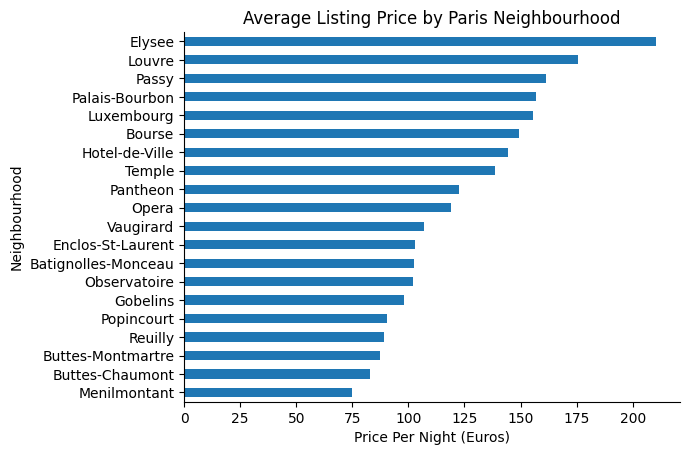

In [17]:
import seaborn as sns

(Paris_Listings_Neighbourhood.plot.barh(
    title = "Average Listing Price by Paris Neighbourhood",
    xlabel = "Price Per Night (Euros)",
    ylabel = "Neighbourhood",
    legend = None
))

sns.despine()

### Created a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed.

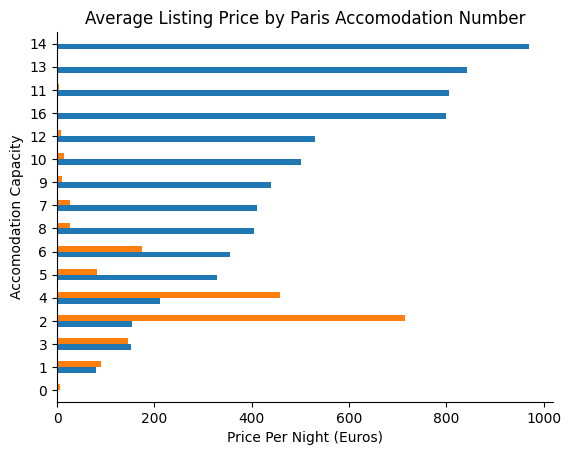

In [18]:
(Paris_Listings_Accommodates.plot.barh(
    title = "Average Listing Price by Paris Accomodation Number",
    xlabel = "Price Per Night (Euros)",
    ylabel = "Accomodation Capacity",
    legend = None
))

sns.despine()

### Created a line chart showing New Air BnB Hosts Over Time

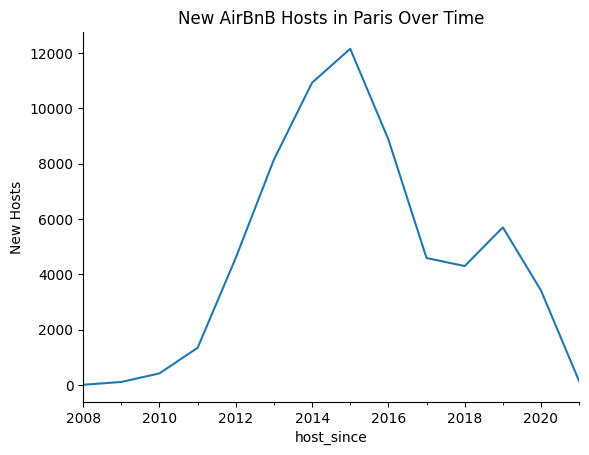

In [19]:
Paris_Listings_Over_Time["neighbourhood"].plot(
    ylabel = "New Hosts",
    title = "New AirBnB Hosts in Paris Over Time"
)

sns.despine()

### Created a line chart showing Average Air BnB Price Over Time

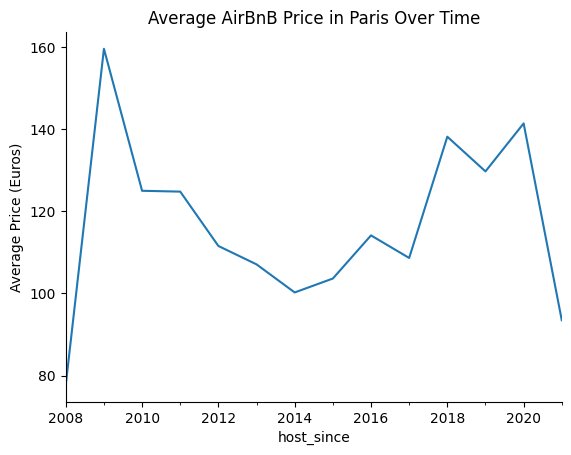

In [20]:
Paris_Listings_Over_Time["price"].plot(
    ylabel = "Average Price (Euros)",
    title = "Average AirBnB Price in Paris Over Time"
)

sns.despine()

### Created two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed.

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts, Higher Prices')

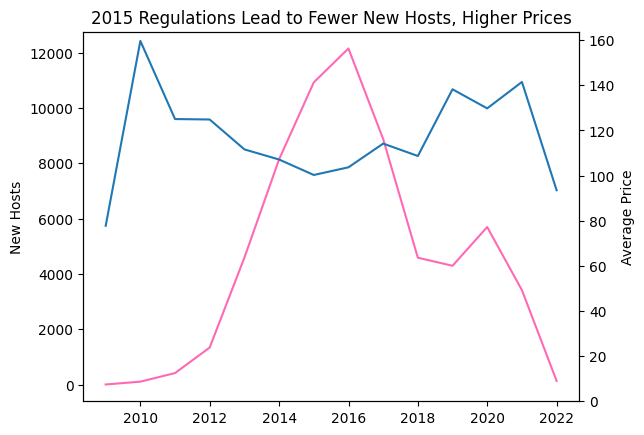

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot (Paris_Listings_Over_Time.index,
         Paris_Listings_Over_Time["neighbourhood"],
         label = "New Hosts",
         c = "hotpink"
)

ax.set_ylabel("New Hosts")


ax2 = ax.twinx()

ax2.plot (Paris_Listings_Over_Time.index,
         Paris_Listings_Over_Time["price"],
         label = "Average Price",
)

ax2.set_ylim(0)

ax2.set_ylabel("Average Price")

ax.set_title("2015 Regulations Lead to Fewer New Hosts, Higher Prices")

# CONCLUSION - 


### Based on My findings, In 2015 regulations, Home Listing Prices get Higher when New Hosts Fall down